# Wine Prediction Using Review_Description

In [143]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
sw = stopwords.words('english')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/knight-ml-assignment/train.csv
/kaggle/input/knight-ml-assignment/test.csv


In [144]:
train = pd.read_csv('/kaggle/input/knight-ml-assignment/train.csv')
test = pd.read_csv('/kaggle/input/knight-ml-assignment/test.csv')

In [145]:
df = train.copy()
df1 = test.copy()

In [146]:
train.head(10)

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec
5,@wineschach,Argentina,Andean 2005 Finca La Escondida Reserva Caberne...,"Strident aromas of licorice, herbs, berries an...",Finca La Escondida Reserva,85,13.0,Other,San Juan,NaN,Andean,Cabernet Sauvignon
6,@wawinereport,US,Gordon Estate 2012 Tradition Red (Columbia Val...,"Half Syrah and half Cabernet Sauvignon, with 4...",Tradition,91,45.0,Washington,Columbia Valley (WA),Columbia Valley,Gordon Estate,Red Blend
7,@vboone,US,Rock Wall 2014 Monte Rosso Reserve Zinfandel (...,"High-toned red fruit stars in this wine, a nic...",Monte Rosso Reserve,90,50.0,California,Sonoma County,Sonoma,Rock Wall,Zinfandel
8,@paulgwine,US,Elizabeth Chambers 2014 Falcon Glen Vineyard P...,"Displaying typical McMinnville AVA subtlety, t...",Falcon Glen Vineyard,91,48.0,Oregon,McMinnville,Willamette Valley,Elizabeth Chambers,Pinot Noir
9,@kerinokeefe,Italy,Mannucci Droandi 2009 Ceppeto Riserva (Chiant...,This blend of Sangiovese and 10% Merlot opens ...,Ceppeto Riserva,86,31.0,Tuscany,Chianti Classico,NaN,Mannucci Droandi,Red Blend


In [147]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82657 entries, 0 to 82656
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_name           63264 non-null  object 
 1   country             82622 non-null  object 
 2   review_title        82657 non-null  object 
 3   review_description  82657 non-null  object 
 4   designation         59010 non-null  object 
 5   points              82657 non-null  int64  
 6   price               77088 non-null  float64
 7   province            82622 non-null  object 
 8   region_1            69903 non-null  object 
 9   region_2            35949 non-null  object 
 10  winery              82657 non-null  object 
 11  variety             82657 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 7.6+ MB


In [148]:
train.describe()

,points,price
count,82657.000000,77088.000000
mean,88.544564,36.922232
std,3.099649,43.698346
min,80.000000,4.000000
25%,86.000000,18.000000
50%,88.000000,27.000000
75%,91.000000,45.000000
max,100.000000,3300.000000


As we can see only price is continous variable in our input. As we can see on minimum and maximium value there is really high diverse in price feature. There is wine which cost 3300 dollars , but we can see that 75 percent of wines are cheaper than 45 dollars.

In [149]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82657 entries, 0 to 82656
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_name           63264 non-null  object 
 1   country             82622 non-null  object 
 2   review_title        82657 non-null  object 
 3   review_description  82657 non-null  object 
 4   designation         59010 non-null  object 
 5   points              82657 non-null  int64  
 6   price               77088 non-null  float64
 7   province            82622 non-null  object 
 8   region_1            69903 non-null  object 
 9   region_2            35949 non-null  object 
 10  winery              82657 non-null  object 
 11  variety             82657 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 7.6+ MB


We see that there is huge number of missing values. Let's see how many percent.

In [150]:
total = train.isnull().sum().sort_values(ascending = False)
percent = (train.isnull().sum()/train.isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
region_2,46708,56.508221
designation,23647,28.608587
user_name,19393,23.462018
region_1,12754,15.430030
price,5569,6.737481
province,35,0.042344
country,35,0.042344
variety,0,0.000000
winery,0,0.000000
points,0,0.000000


The most missing values are in region, destination, tester name and price columns.
We don't want to predict variety for wines which price are undeclared. We will drop rows with NaN value in this column.Lets drop the region_2,designation,user_name and region_1 columns .

In [151]:
train.describe(include = 'all')

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
count,63264,82622,82657,82657,59010,82657.000000,77088.000000,82622,69903,35949,82657,82657
unique,15,38,76983,77628,26424,NaN,NaN,358,1019,17,13786,28
top,@vossroger,US,Korbel NV Brut Sparkling (California),Fresh green herbs on the nose accumulate fruit...,Reserve,NaN,NaN,California,Napa Valley,Central Coast,Testarossa,Pinot Noir
freq,17539,38573,8,2,1382,NaN,NaN,25736,3334,7503,175,10587
mean,NaN,NaN,NaN,NaN,NaN,88.544564,36.922232,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,3.099649,43.698346,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,80.000000,4.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,86.000000,18.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,88.000000,27.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,91.000000,45.000000,NaN,NaN,NaN,NaN,NaN


# **Data visualization**

# **Histogram**

In [152]:
def pastel_plot(data, x, y):
    plt.figure(figsize = (15,6))
    plt.title('Points histogram - whole dataset')
    sns.set_color_codes("pastel")
    sns.barplot(x = x, y=y, data=df)
    locs, labels = plt.xticks()
    plt.show()

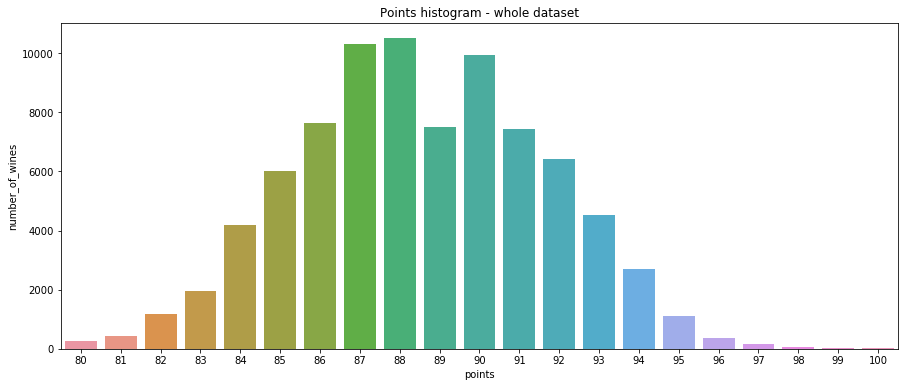

In [153]:
temp = train["points"].value_counts()
df = pd.DataFrame({'points': temp.index,
                   'number_of_wines': temp.values
                  })

pastel_plot(df,'points', 'number_of_wines')

We can see that all wines have number of points above 80. And points has normal distribution. The most wines have 88 points.

We can also get exact distribution not only the histogram. We will show it on price column

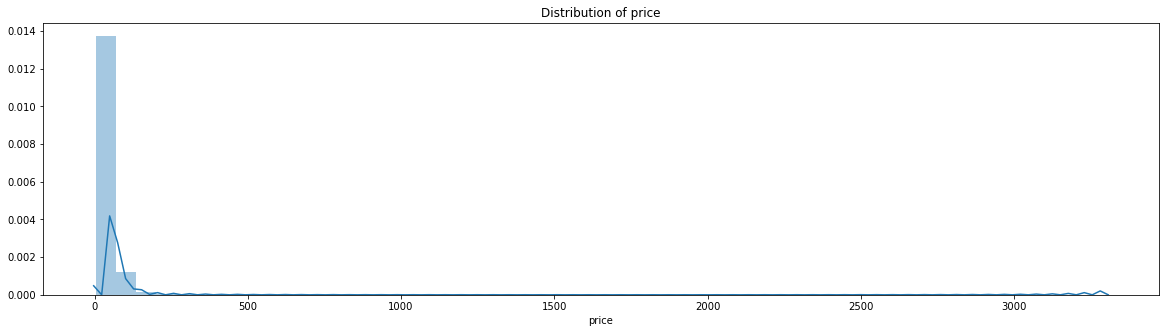

In [154]:
plt.figure(figsize=(20,5))
plt.title("Distribution of price")
ax = sns.distplot(train["price"])

We see that if we want to see better price distribution we have to scale our price or drop the tail. We will drop the tail, so the values that are above 200 dollars. We are also want to calculate how many wines are more expensive then 200 dolars.

There are : 0.587971980594505 % wines more expensive then 200 USD


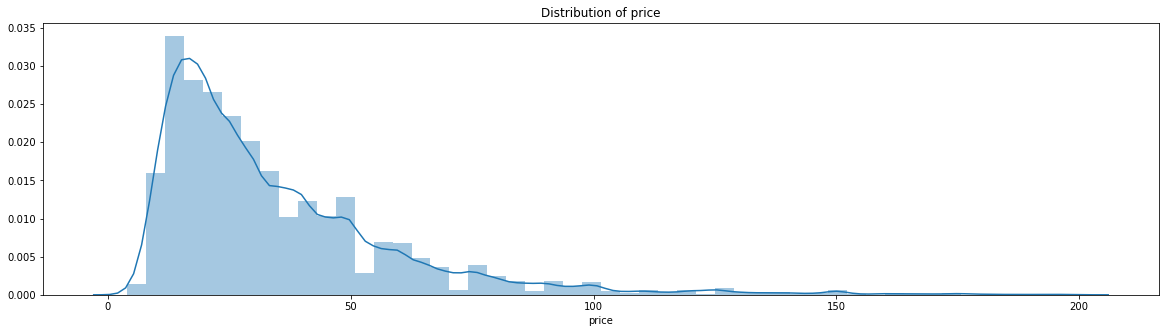

In [155]:
plt.figure(figsize=(20,5))
plt.title("Distribution of price")
ax = sns.distplot(train[train["price"]<200]['price'])

percent=train[train['price']>200].shape[0]/train.shape[0]*100
print("There are :", percent, "% wines more expensive then 200 USD")



Let's investigate which country have most expensive and most high rated wines. First of all we will sort it by price and then plot.

In [156]:
z=train.groupby(['country'])['price','points'].mean().reset_index().sort_values('price',ascending=False)
z[['country','price']].head(n=10)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,country,price
33,Switzerland,107.800000
10,England,50.706897
18,Italy,46.573810
13,Germany,43.591731
11,France,43.371654
35,US,37.462948
5,Canada,33.820809
17,Israel,33.032362
2,Austria,31.662900
29,Serbia,31.500000


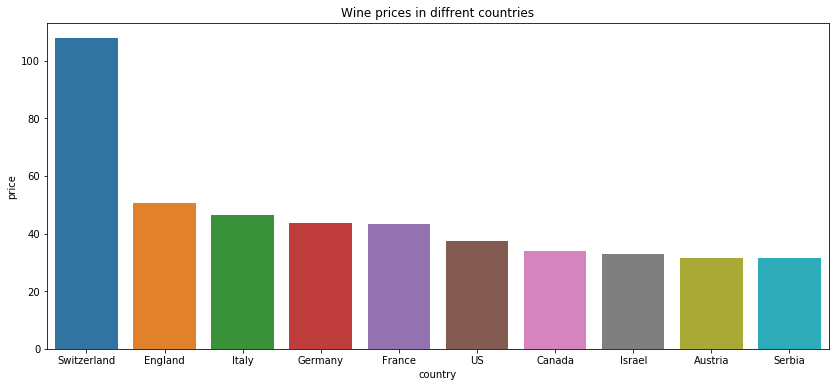

In [157]:
plt.figure(figsize = (14,6))
plt.title('Wine prices in diffrent countries')
sns.barplot(x = 'country', y="price", data=z.head(10))
locs, labels = plt.xticks()
plt.show()

In [158]:
z=z.sort_values('points', ascending=False)
z[['country','points']].head(10)

,country,points
10,England,91.451613
2,Austria,90.372093
13,Germany,90.019072
5,Canada,89.375000
16,India,89.000000
18,Italy,88.964881
11,France,88.882180
24,Morocco,88.809524
35,US,88.617064
17,Israel,88.525000


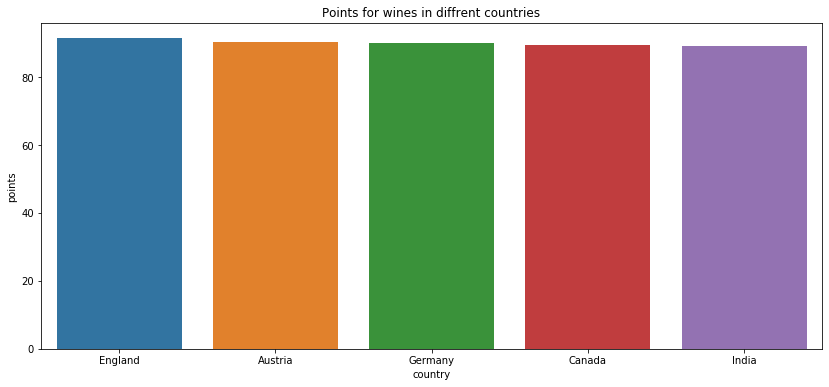

In [159]:
plt.figure(figsize = (14,6))
plt.title('Points for wines in diffrent countries')
sns.set_color_codes("pastel")
sns.barplot(x = 'country', y="points", data=z.head(5))
locs, labels = plt.xticks()
plt.show()

We can easily note, that the wines in Switzerland are the most expensive one.
The highest mean of points came to England Based on our data.

US              38573
France          15948
Italy            9112
Portugal         3197
Chile            2891
Spain            2755
Argentina        2570
Austria          1892
Germany          1573
New Zealand      1121
Australia        1028
South Africa      727
Israel            320
Canada            176
Greece            139
Bulgaria           93
Romania            80
England            62
Slovenia           42
Mexico             38
Name: country, dtype: int64

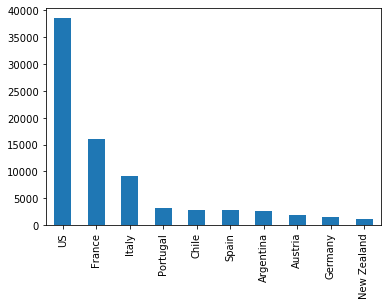

In [160]:
country=train['country'].value_counts()
country.head(10).plot.bar()
country.head(20)

Important thing to investegate will be also price/quality factor.

In [161]:
z['quality/price']=z['points']/z['price']
z.sort_values('quality/price', ascending=False)[['country','quality/price']]

,country,quality/price
36,Ukraine,9.000000
16,India,7.416667
28,Romania,6.951613
12,Georgia,6.722581
26,Peru,5.954955
4,Bulgaria,5.800425
8,Cyprus,5.747253
21,Macedonia,5.733333
9,Czech Republic,5.630435
24,Morocco,4.895013


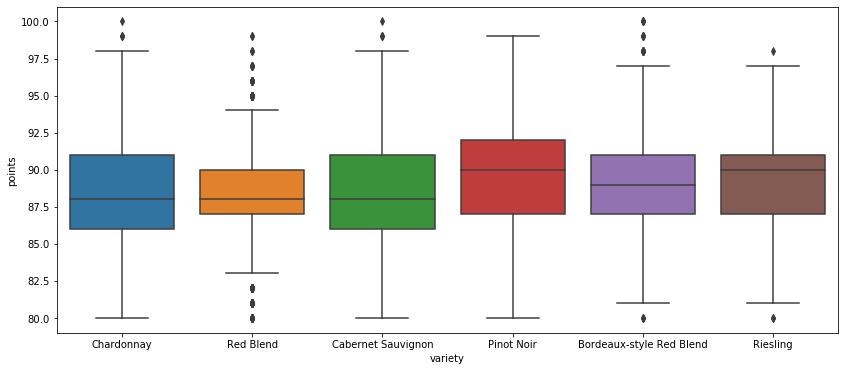

In [162]:
df1= train[train.variety.isin(train.variety.value_counts().head(6).index)]

plt.figure(figsize = (14,6))
sns.boxplot(
    x = 'variety',
    y = 'points',
    data = df1
)

# Input Data

In [163]:
input_data = train['review_description']
output_data = train['variety']
input_data1 = test['review_description']

In [164]:
print ('There are %d varieties of wines in this dataset' % len(set(output_data)))

There are 28 varieties of wines in this dataset


# Encoding

In [165]:
labelEncoder = LabelEncoder()
output_data = labelEncoder.fit_transform(output_data)
output_data

array([ 5, 17, 11, ...,  6,  0,  3])

# Cleaning the Description

In [166]:
input_data = input_data.str.lower()
input_data1 = input_data1.str.lower()

In [167]:
list_aux = []
for phase_word in input_data:
    list_aux.append(' '.join([re.sub('[0-9\W_]', '', word) for word in phase_word.split() if not word in sw]))
input_data = list_aux

In [168]:
list_aux1 = []
for phase_word in input_data1:
    list_aux1.append(' '.join([re.sub('[0-9\W_]', '', word) for word in phase_word.split() if not word in sw]))
input_data1 = list_aux1

# Model

We are using *neural network* to predict the variety.

In [169]:
from keras.layers import Dropout
countVectorizer = CountVectorizer()
input_data = countVectorizer.fit_transform(input_data)
X_train, X_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.2) 
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=len(countVectorizer.get_feature_names())))
model.add(Dropout(0.2))
model.add(Dense(units=output_data.max()+1, activation='sigmoid'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
from keras.callbacks import ModelCheckpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
history = model.fit(X_train, y_train,epochs =2 , 
         validation_data = (X_test, y_test),callbacks = [checkpoint], verbose = 2)

Train on 66125 samples, validate on 16532 samples
Epoch 1/2
 - 61s - loss: 1.3555 - accuracy: 0.6059 - val_loss: 0.9760 - val_accuracy: 0.7027

Epoch 00001: val_accuracy improved from -inf to 0.70270, saving model to weights.best.hdf5
Epoch 2/2
 - 62s - loss: 0.7699 - accuracy: 0.7618 - val_loss: 0.9500 - val_accuracy: 0.7113

Epoch 00002: val_accuracy improved from 0.70270 to 0.71135, saving model to weights.best.hdf5


# Accuracy

In [170]:
score = model.evaluate(X_test,y_test)
score[1]

16532/16532 [==============================] - 4s 223us/step


0.7113476991653442

In [171]:
input_data1 = countVectorizer.fit_transform(input_data1)

In [172]:
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=len(countVectorizer.get_feature_names())))
model.add(Dropout(0.2))
model.add(Dense(units=output_data.max()+1, activation='sigmoid'))

# Test Prediction

In [173]:
result = model.predict(input_data1)
result

array([[0.48748133, 0.5080229 , 0.51964855, ..., 0.49860954, 0.48919794,
        0.49182105],
       [0.5042168 , 0.5047797 , 0.5141163 , ..., 0.47680327, 0.5260852 ,
        0.4942142 ],
       [0.4844341 , 0.493615  , 0.5023612 , ..., 0.4983591 , 0.5123073 ,
        0.50458306],
       ...,
       [0.5036304 , 0.5045937 , 0.52836037, ..., 0.46645966, 0.5069839 ,
        0.49421874],
       [0.4948835 , 0.49045438, 0.50433356, ..., 0.48581216, 0.5028412 ,
        0.4921202 ],
       [0.50588524, 0.49807695, 0.50694937, ..., 0.5023511 , 0.52076584,
        0.5143958 ]], dtype=float32)

In [174]:
result = np.argmax(result,axis = 1)

In [175]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(train['variety'])


LabelEncoder()

In [176]:
result = le.inverse_transform(result)

In [177]:
result = pd.Series(result,name="variety")

In [178]:
result

0               Cabernet Franc
1                 Pinot Grigio
2        Rhône-style Red Blend
3                  White Blend
4           Cabernet Sauvignon
                 ...          
20660           Portuguese Red
20661             Pinot Grigio
20662           Cabernet Franc
20663             Pinot Grigio
20664               Sangiovese
Name: variety, Length: 20665, dtype: object

# Concatenate the prediction with test data set

In [179]:
submission = pd.concat([test,result],axis = 1)

In [180]:
submission

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,@paulgwine,US,Boedecker Cellars 2011 Athena Pinot Noir (Will...,Nicely differentiated from the companion Stewa...,Athena,88,35.0,Oregon,Willamette Valley,Willamette Valley,Boedecker Cellars,Cabernet Franc
1,@wineschach,Argentina,Mendoza Vineyards 2012 Gran Reserva by Richard...,"Charred, smoky, herbal aromas of blackberry tr...",Gran Reserva by Richard Bonvin,90,60.0,Mendoza Province,Mendoza,NaN,Mendoza Vineyards,Pinot Grigio
2,@vboone,US,Prime 2013 Chardonnay (Coombsville),"Slightly sour and funky in earth, this is a re...",NaN,87,38.0,California,Coombsville,Napa,Prime,Rhône-style Red Blend
3,@wineschach,Argentina,Bodega Cuarto Dominio 2012 Chento Vineyard Sel...,"This concentrated, midnight-black Malbec deliv...",Chento Vineyard Selection,91,20.0,Mendoza Province,Mendoza,NaN,Bodega Cuarto Dominio,White Blend
4,@kerinokeefe,Italy,SassodiSole 2012 Brunello di Montalcino,"Earthy aromas suggesting grilled porcini, leat...",NaN,90,49.0,Tuscany,Brunello di Montalcino,NaN,SassodiSole,Cabernet Sauvignon
...,...,...,...,...,...,...,...,...,...,...,...,...
20660,@gordone_cellars,US,Yorkville Cellars 2013 Rennie Vineyard Caberne...,"Clearly focused and fruit-driven, this wine ha...",Rennie Vineyard,91,34.0,California,Yorkville Highlands,North Coast,Yorkville Cellars,Portuguese Red
20661,@laurbuzz,France,Château Ribaute 2015 Senhal d'Aric Rosé (Corbi...,Herbal tones of bay and rosemary are upfront o...,Senhal d'Aric,84,20.0,Languedoc-Roussillon,Corbières,NaN,Château Ribaute,Pinot Grigio
20662,@mattkettmann,US,Daou 2014 Reserve Cabernet Sauvignon (Paso Rob...,"Mocha cream, pencil shaving and dried herb aro...",Reserve,94,85.0,California,Paso Robles,Central Coast,Daou,Cabernet Franc
20663,@wineschach,Spain,Peñascal 2011 Tempranillo Rosé (Vino de la Tie...,Loud citrus and berry aromas precede an overlo...,Tempranillo,80,9.0,Northern Spain,Vino de la Tierra de Castilla y León,NaN,Peñascal,Pinot Grigio


In [181]:
submission.to_csv("wine_variety.csv",index=False)